## IN Depth: Naive Bayes Classification

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

`Gaussian Naive Bayes`

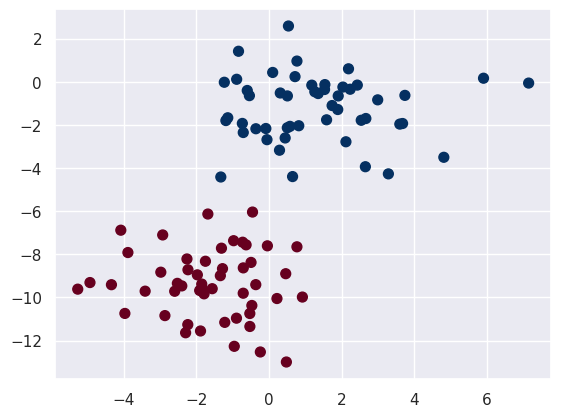

In [2]:
from sklearn.datasets import make_blobs
X,y =make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')

Thise procedure is implemented in Scikit-Learn sklearn.naive_bayes.GaussianNB estimator:


In [3]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(X,y)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [4]:
# now lets generate some new data and predict the label:

rng =np.random.RandomState(0)
Xnew =[-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew =model.predict(Xnew)

(np.float64(-5.890554373486014),
 np.float64(7.777566725032841),
 np.float64(-13.775943665162341),
 np.float64(3.3634536696825847))

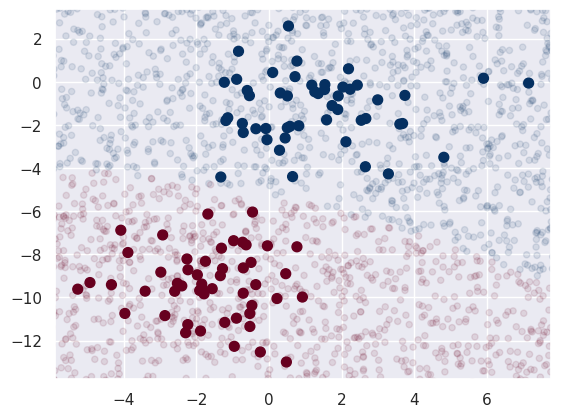

In [6]:
#now we can plot this new data to get an idea of where the decision boundary is

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim =plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [7]:
yprob =model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Naive Bayes

`Example: Classifying text`

In [9]:
from sklearn.datasets import fetch_20newsgroups

data =fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
# For simplicity, we will select just a few of these categoris, and download the trainin and testing set:

categories =['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train =fetch_20newsgroups(subset='train', categories=categories)
test =fetch_20newsgroups(subset='test', categories=categories)

In [11]:
# Here is representative entry from the data:

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model =make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [13]:
model.fit(train.data, train.target)
labels =model.predict(test.data)

Text(109.44999999999996, 0.5, 'Predicted label')

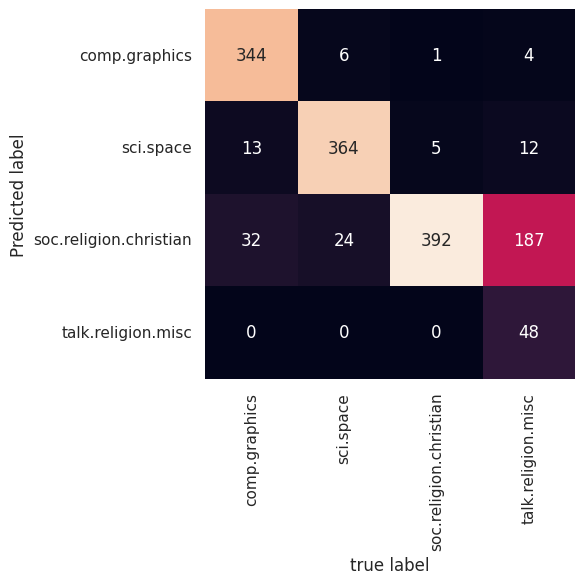

In [14]:
# Confusion matrix between the true and predictred labels for the test data

from sklearn.metrics import confusion_matrix

mat =confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel("Predicted label")

In [15]:
def predict_category(s, train=train, model=model):
    pred =model.predict([s])
    return train.target_names[pred[0]]

In [16]:
predict_category('sending a played to the ISS')

'soc.religion.christian'

In [17]:
predict_category(' discussing  islam ve atheism')

'soc.religion.christian'